In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly.graph_objs as go
import plotly.offline as pyo
warnings.filterwarnings("ignore") 

accelaration = pd.read_csv("accelaration.csv") 
gyros = pd.read_csv("gyroscope.csv")
gps = pd.read_csv("gps.csv")

print(accelaration.columns)      # x,y,z,deviceId,sessionId,timestamp,uid
print(accelaration.shape)        # (14000,7)
print(accelaration.info())       # float64,object,int64 and not-null
print(accelaration.describe())

print(gyros.columns)      # x,y,z,deviceId,sessionId,timestamp,uid
print(gyros.shape)        # (396,7)
print(gyros.info())       # float64,object,int64 and not-null
print(gyros.describe())

print(gps.columns)      # 'altitude', 'latitude', 'longitude', 'deviceId', 'sessionId','timestamp', 'uid']
print(gps.shape)        # (162,7)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Index(['x', 'y', 'z', 'deviceId', 'sessionId', 'timestamp', 'uid'], dtype='object')
(14000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          14000 non-null  float64
 1   y          14000 non-null  float64
 2   z          14000 non-null  float64
 3   deviceId   14000 non-null  object 
 4   sessionId  14000 non-null  object 
 5   timestamp  14000 non-null  int64  
 6   uid        14000 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 765.8+ KB
None
                  x             y             z     timestamp            uid
count  14000.000000  14000.000000  14000.000000  1.400000e+04   14000.000000
mean       9.788160     -0.334504     -0.521737  1.591014e+12  169919.500000
std        1.471877      1.110827      1.269347  3.129078e+04    2020.798094
min        1.638992     -6.021668     -9.567200  1.591014e+1

In [2]:
# Removing Unnecessary columns and Preprocessing
acc = accelaration.drop(axis = 1,columns = ['deviceId', 'sessionId','uid'])

gyro = gyros.drop(axis=1,columns= ['deviceId', 'sessionId','uid'])

gp = gps.drop(axis=1,columns= ['altitude','deviceId', 'sessionId','uid'])

from datetime import datetime
acc['timestamp'] = pd.to_datetime(acc['timestamp'],unit='ms')
print(acc.head(15))

gyro['timestamp'] = pd.to_datetime(gyro['timestamp'],unit='ms')
print(gyro.head(15))

gp['timestamp'] = pd.to_datetime(gp['timestamp'],unit='ms')
print(gp.head(15))


            x         y         z               timestamp
0    9.733795 -0.110886 -0.292145 2020-06-01 12:26:21.128
1    9.855011  0.114197 -0.079742 2020-06-01 12:26:21.128
2    9.855011  0.114197 -0.079742 2020-06-01 12:26:21.128
3    9.855011  0.114197 -0.079742 2020-06-01 12:26:21.128
4    9.855011  0.114197 -0.079742 2020-06-01 12:26:21.128
5    9.833130  0.120743 -0.140884 2020-06-01 12:26:21.128
6    9.728668  0.062622 -0.280548 2020-06-01 12:26:21.128
7    9.527954 -0.185745 -0.451492 2020-06-01 12:26:21.129
8   10.009262  0.036942 -0.074860 2020-06-01 12:26:21.129
9    9.826096  0.177078 -0.391449 2020-06-01 12:26:21.936
10   9.645218  0.026184 -0.448807 2020-06-01 12:26:21.943
11   9.877655 -0.140366 -0.168854 2020-06-01 12:26:21.943
12   9.859207 -0.034073 -0.199814 2020-06-01 12:26:21.943
13   9.796158  0.205582 -0.407608 2020-06-01 12:26:21.944
14   9.726852  0.075775 -0.338409 2020-06-01 12:26:21.944
           x         y         z               timestamp
0   0.000458 -0

In [3]:
gyro.drop([0,1,2,3,4],inplace = True)
print(gyro)
lst = [i for i in range(234)]
acc.drop(lst,inplace =True)
print(acc)



            x         y         z               timestamp
5    0.065567 -0.003036  0.003967 2020-06-01 12:26:25.372
6    0.041916 -0.000946  0.006241 2020-06-01 12:26:25.871
7   -0.012405 -0.001587 -0.001678 2020-06-01 12:26:26.372
8   -0.039505 -0.000275 -0.003113 2020-06-01 12:26:27.275
9   -0.060410 -0.005020 -0.004089 2020-06-01 12:26:27.381
..        ...       ...       ...                     ...
391 -0.011307  0.028748  0.006699 2020-06-01 12:28:07.411
392  0.079300  0.035843 -0.008606 2020-06-01 12:28:07.911
393 -0.124054 -0.031921 -0.025803 2020-06-01 12:28:08.412
394 -0.015564 -0.023880  0.019989 2020-06-01 12:28:09.508
395 -0.055099 -0.008591 -0.027924 2020-06-01 12:28:09.911

[391 rows x 4 columns]
               x         y         z               timestamp
234     9.973679  0.260910 -1.780197 2020-06-01 12:26:25.003
235     9.448547  0.316055 -1.019333 2020-06-01 12:26:25.011
236     9.672226  0.261810 -1.984512 2020-06-01 12:26:25.022
237     9.679947  0.238358 -1.170258

In [4]:
# Finding Correlation between gyroscopic and accelaration data(Spearman rank correlation coefficient)
Xacc = np.array(list(acc['x']))
Xgyro = np.array(list(gyro['x']))
Yacc = np.array(list(acc['y']))
print(len(Xacc))
print(len(Xgyro))

import statistics
ls =[];medi=[]
m = 0
for t in range(391):
    for k in range(35):
            ls.append(Xacc[k+m])
    m = m + 35
    medi.append(statistics.variance(ls))
    ls=[]
print(len(medi))

from scipy import stats
stats.spearmanr(Xgyro,medi)

13766
391
391


SpearmanrResult(correlation=0.0882054858947419, pvalue=0.08151490448552225)

In [5]:
Yacc = np.array(list(acc['y']))
Ygyro = np.array(list(gyro['y']))

import statistics
ls =[];medi=[]
m = 0
for t in range(391):
    for k in range(35):
            ls.append(Yacc[k+m])
    m = m + 35
    medi.append(statistics.median(ls))
    ls=[]
print(len(medi))

from scipy import stats
stats.spearmanr(Ygyro,medi)

391


SpearmanrResult(correlation=0.0014139221443592585, pvalue=0.9777666322667468)

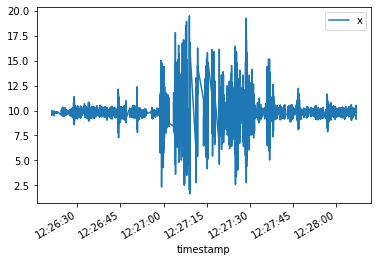

In [6]:
acc.plot(kind='line', y='x', x='timestamp') 
plt.show()

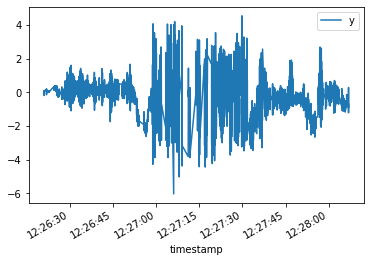

In [7]:
acc.plot(kind='line', y='y', x='timestamp') 
plt.show()

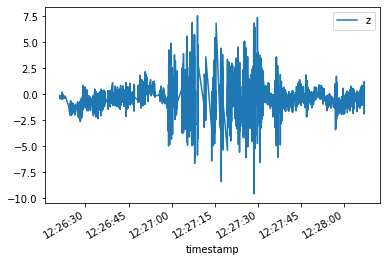

In [8]:
acc.plot(kind='line', y='z', x='timestamp') ;
plt.show()

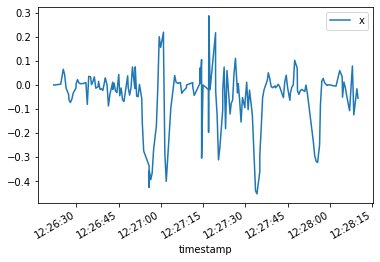

In [9]:
gyro.plot(kind='line', y='x', x='timestamp') ;
plt.show()

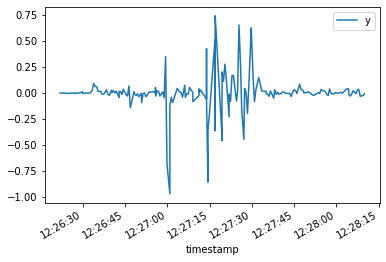

In [10]:
gyro.plot(kind='line', y='y', x='timestamp') 
plt.show()

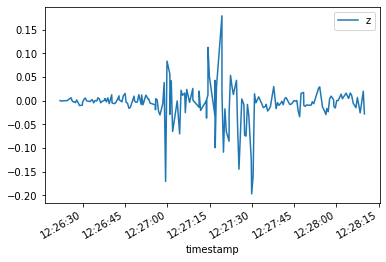

In [11]:
gyro.plot(kind='line', y='z', x='timestamp') 
plt.show()

# Histogram and PDF


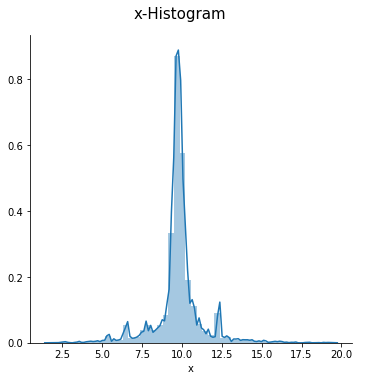

In [12]:
#Histogram
g = sns.FacetGrid(acc,size = 5) \
    .map(sns.distplot,"x") \
    .add_legend();
g.fig.suptitle('x-Histogram',fontsize=15,x =0.5, y= 1.05)
plt.show();

In [13]:
Xacc = np.array(acc['x'])
import statistics
med = statistics.median(acc['x'])
X= [abs(i-med) for i in Xacc]

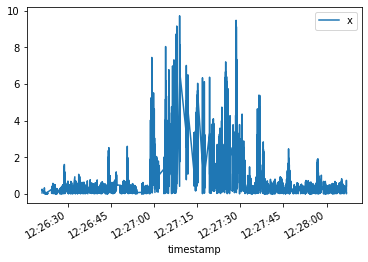

In [14]:
acc['x'] = X
acc.plot(kind='line', y='x', x='timestamp') 
plt.show()

In [15]:
acc.describe()

x             y             z
count  13766.000000  13766.000000  13766.000000
mean       0.840365     -0.343431     -0.516456
std        1.223298      1.117956      1.276890
min        0.000000     -6.021668     -9.567200
25%        0.136429     -0.951401     -1.089554
50%        0.332550     -0.212219     -0.500107
75%        0.933243      0.201965      0.071610
max        9.726136      4.541885      7.547104

# Histogram and PDF

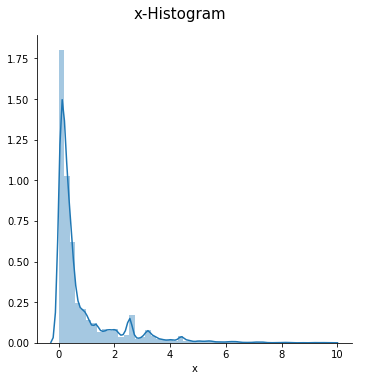

In [16]:
#Histogram
g = sns.FacetGrid(acc,size = 5) \
    .map(sns.distplot,"x") \
    .add_legend();
g.fig.suptitle('x-Histogram',fontsize=15,x =0.5, y= 1.05)
plt.show();

# Cumulative Density Function

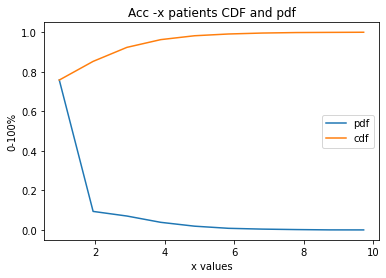

In [17]:
counts, bin_edges = np.histogram(acc['x'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.title("Acc -x patients CDF and pdf")
plt.xlabel("x values")
plt.ylabel("0-100%")
plt.legend(loc='best')
plt.show();

In [18]:
import plotly.offline as pyo
import plotly.graph_objs as go
data = [go.Histogram(x = X)]
layout = go.Layout(title = 'Acceleration - X values')
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)

'temp-plot.html'

# Gaussian Distribution via Standardization

In [19]:
Xa= np.array(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtacc= scaler.fit_transform(Xa.reshape(-1,1))
XSacc = Xtacc.flatten()
print(XSacc)

[-0.53085474 -0.41383732 -0.59669308 ... -0.58768595 -0.58768595
 -0.63983948]


# QQ Plot

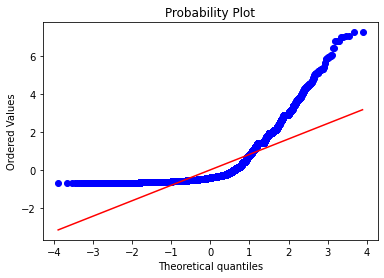

In [20]:
import pylab 
import scipy.stats as stats
stats.probplot(XSacc, dist="norm", plot=pylab)
pylab.show()

# Percentiles

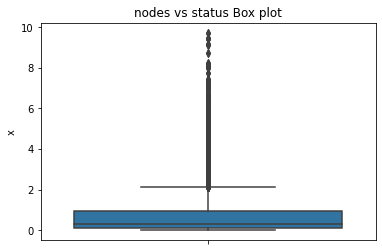

In [21]:
sns.boxplot(y = 'x',data= acc).set_title("nodes vs status Box plot")
plt.show()

# Plotly Box Plot

In [22]:
data = [go.Box(y = X,boxpoints= 'all',jitter = 0.4)]
layout = go.Layout(title = 'Acceleration - X values')
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)

'temp-plot.html'

# Observation

1. Anything greater than 2.126571 or the max value can be treated as Outliers. The points above this level can be thought of either satisfactory or bad quality road.

# Percentiles

In [23]:
Xp = np.array(X)
for i in range(1,101):
    print(" The {} percentile is {}".format(i,np.percentile(Xp,i)))

 The 1 percentile is 0.006209999999999383
 The 2 percentile is 0.013610500000000414
 The 3 percentile is 0.019515999999999423
 The 4 percentile is 0.024032000000000053
 The 5 percentile is 0.02941900000000075
 The 6 percentile is 0.03668050000000065
 The 7 percentile is 0.04344200000000065
 The 8 percentile is 0.048491999999999535
 The 9 percentile is 0.05578599999999945
 The 10 percentile is 0.05738799999999955
 The 11 percentile is 0.06187399999999954
 The 12 percentile is 0.06506399999999957
 The 13 percentile is 0.06691000000000003
 The 14 percentile is 0.07279899999999984
 The 15 percentile is 0.07940600000000053
 The 16 percentile is 0.08606819999999937
 The 17 percentile is 0.0908827000000005
 The 18 percentile is 0.09554999999999936
 The 19 percentile is 0.1032732000000001
 The 20 percentile is 0.10954249999999988
 The 21 percentile is 0.11511300000000091
 The 22 percentile is 0.1215879000000003
 The 23 percentile is 0.12333700000000114
 The 24 percentile is 0.12968500000000027

# Observation

1. Below 2.126571 almost 87 percent of our point lies.

# Calculating percentage change in values when moving from 1 percentile to another

# Scatter Plot

In [ ]:
data = [go.Scatter(x = X,mode='markers')]
layout = go.Layout(title = 'Acceleration - X values')
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)

# Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage ='ward')
a = model.fit_predict(Xp.reshape(-1,1))

In [25]:
[print(i) for i in a]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
1
3
3
3
1
3
3
3
3
1
3
3
3
3
1
3
3
3
1
1
3
3
3
1
3
3
3
1
3
3
3
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
1
1
3
1


1
3
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
3
3
1
1
1
3
1
3
1
3
3
3
3
1
3
1
3
1
1
3
3
3
1
2
1
2
3
3
3
3
2
1
3
3
1
1
3
1
3
3
1
1
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
3
1
1
1
1
1
1
1
3
1
1
1
3
3
1
1
1
3
1
3
3
3
3
3
3
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
1
1
3
1
1
1
1
1
1
1
1
1
1
3
1
1
3
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
3
1
3
1
3
1
3
1
1
1
1
1
1
3
1
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [26]:
print(list(a).count(1))
print(list(a).count(2))
print(list(a).count(3))
print(list(a).count(0))
print(list(a).count(0)+list(a).count(3)+list(a).count(2)+list(a).count(1))

9280
1320
2120
1046
13766


In [27]:
acc['label']= a

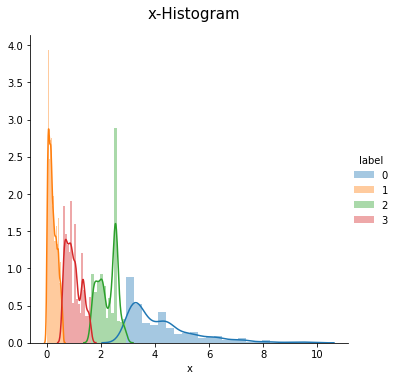

In [28]:
g = sns.FacetGrid(acc,size = 5,hue='label') \
    .map(sns.distplot,"x") \
    .add_legend();
g.fig.suptitle('x-Histogram',fontsize=15,x =0.5, y= 1.05)
plt.show();

In [58]:
data = [go.Scatter(x = acc['x'],mode='markers',marker =dict(color = acc['label'],colorscale = 'Viridis'),hovertext=acc['label'])]
layout = go.Layout(title = 'Acceleration - X values')
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)

'temp-plot.html'

In [30]:
from sklearn.metrics import davies_bouldin_score 
print(davies_bouldin_score(Xp.reshape(-1,1), a)) 

0.5618422965538469


In [32]:
from sklearn.metrics import silhouette_score
print(silhouette_score(Xp.reshape(-1,1), a,)) 

0.6599143295070136


In [ ]:
data = [go.Scatter(y = acc['x'],x=acc['timestamp'],mode='markers',marker =dict(color = acc['label'],colorscale = 'Viridis'),hovertext=acc['label'])]
layout = go.Layout(title = 'Acceleration - X values')
fig = go.Figure(data = data,layout = layout)
pyo.plot(fig)

In [33]:
print(gp.shape)
print(gp.drop_duplicates().shape)
gp_pr=gp.drop_duplicates()
print(gp_pr)

(162, 3)
(13, 3)
     latitude  longitude               timestamp
0   49.038707   8.332002 2020-06-01 12:26:25.000
1   49.038870   8.332001 2020-06-01 12:26:32.668
3   49.039283   8.331342 2020-06-01 12:26:42.695
6   49.039714   8.330604 2020-06-01 12:26:52.639
9   49.040181   8.330689 2020-06-01 12:27:04.000
14  49.040375   8.330953 2020-06-01 12:27:12.641
19  49.040791   8.331533 2020-06-01 12:27:22.621
26  49.041143   8.332198 2020-06-01 12:27:32.641
33  49.041179   8.332473 2020-06-01 12:27:42.661
41  49.040898   8.333051 2020-06-01 12:27:52.641
50  49.040498   8.333391 2020-06-01 12:28:02.621
60  49.039788   8.333293 2020-06-01 12:28:14.000
71  49.038779   8.332655 2020-06-01 12:28:22.401


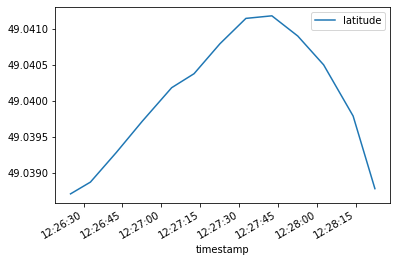

In [34]:
gp_pr.plot(kind='line', y='latitude', x='timestamp') 
plt.show()

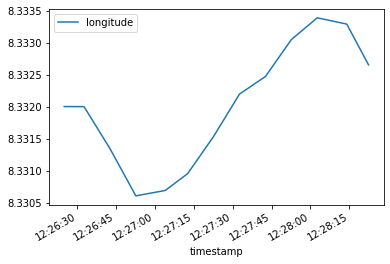

In [35]:
gp_pr.plot(kind='line', y='longitude', x='timestamp') 
plt.show()

In [38]:
acc1 = accelaration.drop(axis = 1,columns = ['deviceId', 'sessionId','uid'])
lst = [i for i in range(234)]
acc1.drop(lst,inplace =True)

In [39]:
gp_p = gps.drop(axis=1,columns= ['altitude','deviceId', 'sessionId','uid'])
gp_s = gp_p.drop_duplicates()
a = np.array(gp_s.latitude)
b = np.array(gp_s.longitude)
x = np.vstack((a, b)).T
y = np.array(gp_s.timestamp)
from scipy import interpolate
interpolate.LinearNDInterpolator(x, y, fill_value=np.nan, rescale=False)

In [40]:
x = np.array(gp_s.timestamp)
y = np.array(gp_s.latitude)
g = interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)

In [41]:
x = np.array(acc1.timestamp)
f = g.__call__(x, nu=0)
print(f)
acc.insert(3, "latitude", f, True)
print(acc.head())

[49.03870714 49.03870724 49.03870738 ... 49.04027521 49.04027521
 49.04027521]
            x         y         z   latitude               timestamp  label
234  0.190995  0.260910 -1.780197  49.038707 2020-06-01 12:26:25.003      1
235  0.334137  0.316055 -1.019333  49.038707 2020-06-01 12:26:25.011      1
236  0.110458  0.261810 -1.984512  49.038707 2020-06-01 12:26:25.022      1
237  0.102737  0.238358 -1.170258  49.038707 2020-06-01 12:26:25.031      1
238  0.252274  0.202301 -1.422241  49.038708 2020-06-01 12:26:25.041      1


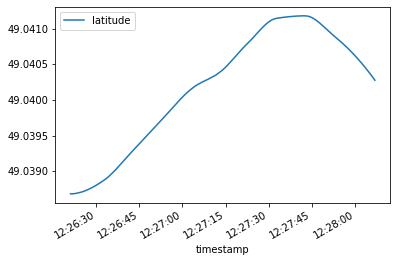

In [42]:
acc.plot(kind='line', y='latitude', x= 'timestamp') 
plt.show()

In [43]:
x = np.array(gp_s.timestamp)
y = np.array(gp_s.longitude)
g = interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)

In [44]:
x = np.array(acc1.timestamp)
f = g.__call__(x, nu=0)
print(f)
acc.insert(4, "longitude", f, True)
print(acc.head())

[8.3320019  8.3320019  8.3320019  ... 8.33337552 8.33337552 8.33337552]
            x         y         z   latitude  longitude  \
234  0.190995  0.260910 -1.780197  49.038707   8.332002   
235  0.334137  0.316055 -1.019333  49.038707   8.332002   
236  0.110458  0.261810 -1.984512  49.038707   8.332002   
237  0.102737  0.238358 -1.170258  49.038707   8.332002   
238  0.252274  0.202301 -1.422241  49.038708   8.332002   

                  timestamp  label  
234 2020-06-01 12:26:25.003      1  
235 2020-06-01 12:26:25.011      1  
236 2020-06-01 12:26:25.022      1  
237 2020-06-01 12:26:25.031      1  
238 2020-06-01 12:26:25.041      1  


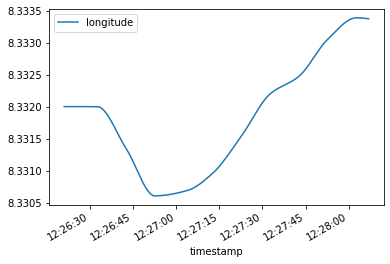

In [45]:
acc.plot(kind='line', y='longitude', x='timestamp') 
plt.show()

In [46]:
print(acc)

              x         y         z   latitude  longitude  \
234    0.190995  0.260910 -1.780197  49.038707   8.332002   
235    0.334137  0.316055 -1.019333  49.038707   8.332002   
236    0.110458  0.261810 -1.984512  49.038707   8.332002   
237    0.102737  0.238358 -1.170258  49.038707   8.332002   
238    0.252274  0.202301 -1.422241  49.038708   8.332002   
...         ...       ...       ...        ...        ...   
13995  0.630493 -0.947815  1.127640  49.040275   8.333376   
13996  0.136566 -0.185486 -0.341919  49.040275   8.333376   
13997  0.121476  0.293274 -1.293487  49.040275   8.333376   
13998  0.121476  0.293274 -1.293487  49.040275   8.333376   
13999  0.057679 -0.696899 -0.788315  49.040275   8.333376   

                    timestamp  label  
234   2020-06-01 12:26:25.003      1  
235   2020-06-01 12:26:25.011      1  
236   2020-06-01 12:26:25.022      1  
237   2020-06-01 12:26:25.031      1  
238   2020-06-01 12:26:25.041      1  
...                       ...    

In [47]:
import osmnx as ox
place_name = "Knielingen,Karlsruhe,Germany"
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

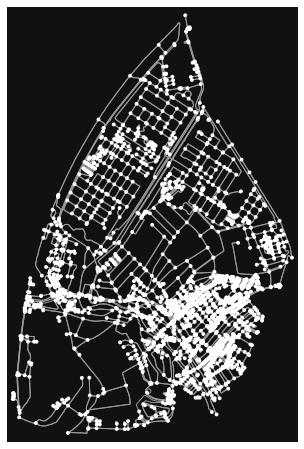

<Figure size 432x288 with 0 Axes>

In [48]:
fig, ax = ox.plot_graph(graph)
plt.tight_layout()

In [49]:
import plotly.express as px

fig = px.scatter_mapbox(acc, lat="latitude", lon="longitude", hover_name="label", hover_data=["label"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300,color = "label")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
print(acc.latitude.min())
print(acc.latitude.max())
print(acc.longitude.min())
print(acc.longitude.max())

In [ ]:
import folium

#Define coordinates of where we want to centre our map
Karlsruhe = [49.0069, 8.4037]

#Build the map
my_map = folium.Map(location = Karlsruhe, zoom_start = 13)

my_map

In [51]:
acc.reset_index(drop=True,inplace=True)
print(acc.latitude[0])

49.03870713805378


In [56]:
from gmplot import * 
  
latitude_list = list(acc.latitude)
longitude_list = list(acc.longitude)
  
gmap3 = gmplot.GoogleMapPlotter(49.0069, 8.4037, 18) 
  
# scatter method of map object  
# scatter points on the google map 

gmap3.draw( "C:\\Users\\Kunal Malik\\Desktop\\map1.html")

In [ ]:
prinr()